<a href="https://colab.research.google.com/github/h8erqqq/ML/blob/main/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [2]:
!pip install pandas
!pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [109]:
df = pd.read_csv("/content/ca_offenses_by_agency.csv") # чтение файла
df.dropna()
df


,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# фикс
from numpy import nan

def convert_to_float(df, column_name):
    # Convert the column to string, replace non-numeric values and NaN with empty strings, then convert to float
    df[column_name] = df[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', nan).astype(float)
    return df[column_name]

# Example for replace the column dtype
df['Motor vehicle theft'] = convert_to_float(df, 'Motor vehicle theft')
df['Violent crime'] = convert_to_float(df, 'Violent crime')
df['Motor vehicle theft']


0      2.0
1      2.0
2      0.0
3      0.0
4      1.0
      ... 
228    NaN
229    NaN
230    NaN
231    NaN
232    NaN
Name: Motor vehicle theft, Length: 233, dtype: float64

In [124]:
x = df["Violent crime"]
y = df["Property crime"]

In [133]:
describe = x.describe # ваш код здесь
describe

<bound method NDFrame.describe of 0      321.0
1       12.0
2      149.0
3        2.0
4        0.0
       ...  
228      NaN
229      NaN
230      NaN
231      NaN
232      NaN
Name: Violent crime, Length: 233, dtype: float64>

In [126]:
mean = x.mean() # (среднее) ваш код здесь
mean

15.976331360946746

In [127]:
median = x.median() # (медиана) ваш код здесь
median

0.0

In [128]:
mode = x.mode() # (мода) ваш код здесь
mode

0    0.0
Name: Violent crime, dtype: float64

In [129]:
min = x.min() # (минимум) ваш код здесь
min

0.0

In [130]:
max = x.max() # (максимум) ваш код здесь
max

803.0

In [131]:
std = x.std() # (стандартное отклонение) Ваш код здесь
std

81.07264178491278

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [134]:
q1 = x.quantile(0.25) # (25% квантиль) ваш код здесь
q1

0.0

In [135]:
q2 = x.quantile(0.50) # (50% квантиль) ваш код здесь
q2

0.0

In [137]:
q3 = x.quantile(0.75) # (75% квантиль) ваш код здесь
q3

2.0

In [138]:
iqr = q3 - q1 # (интерквартильный размах) ваш код здесь
iqr

2.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Example: видим, что среднее и отклонение различается между группами, следовательно...
Сделать подобные выводы относительно других статистических характеристик
```


In [139]:
df["Property crime"] = df["Property crime"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   State/Tribal/Other                    169 non-null    object  
 1   Agency                                169 non-null    object  
 2   Unit/Office                           143 non-null    object  
 3   Violent crime                         169 non-null    float64 
 4   Murder and nonnegligent manslaughter  169 non-null    float64 
 5   Rape (revised definition)             169 non-null    float64 
 6   Rape (legacy definition)              0 non-null      float64 
 7   Robbery                               169 non-null    float64 
 8   Aggravated assault                    169 non-null    float64 
 9   Property crime                        169 non-null    category
 10  Burglary                              169 non-null    float64 
 11  Larcen

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

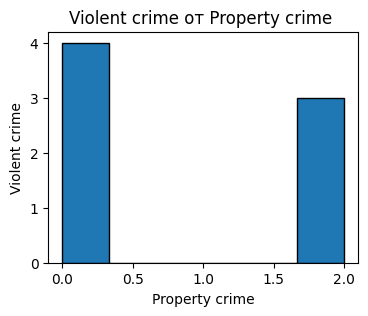

In [140]:
"""

Ваш код здесь

"""
plt.figure(figsize=(4, 3))
plt.hist(x, bins=6, edgecolor='black')
plt.title('Violent crime от Property crime ')
plt.xlabel('Property crime')
plt.ylabel('Violent crime')
plt.show()

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

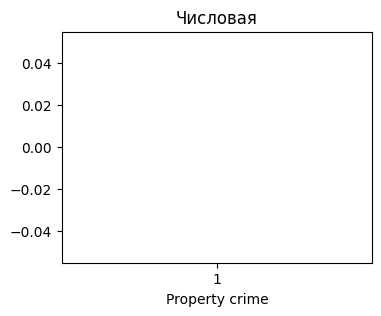

In [141]:
"""

Ваш код здесь

"""
plt.figure(figsize=(4, 3))
plt.boxplot(x)
plt.title('Числовая')
plt.xlabel('Property crime')
plt.show()

<Axes: xlabel='Property crime', ylabel='Violent crime'>

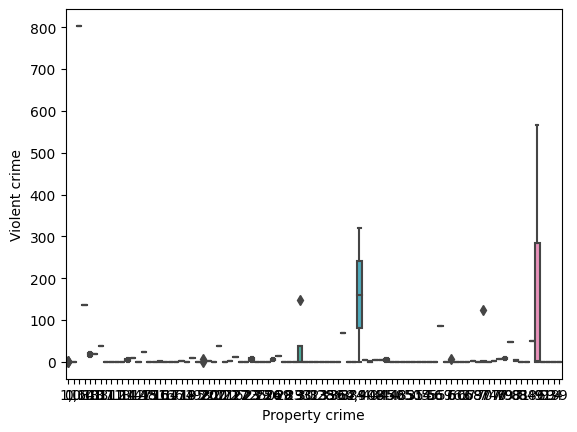

In [148]:
"""

Ваш код здесь

"""
sns.boxplot(y="Violent crime",x='Property crime',data=df)

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [99]:
df.columns

Index(['State/Tribal/Other', 'Agency', 'Unit/Office', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape (revised definition)',
       'Rape (legacy definition)', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft',
       'Arson'],
      dtype='object')

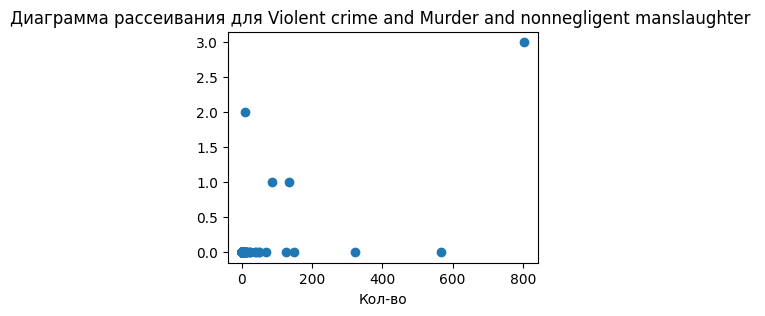

In [151]:
"""

Ваш код здесь

"""
plt.figure(figsize=(4, 3))
plt.scatter(df['Violent crime'], df['Murder and nonnegligent manslaughter'])
plt.title('Диаграмма рассеивания для Violent crime and Murder and nonnegligent manslaughter ')
plt.xlabel('Кол-во')
plt.ylabel('')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<ipython-input-106-16cfb57ed6be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr() #ваш код здесь


<Axes: >

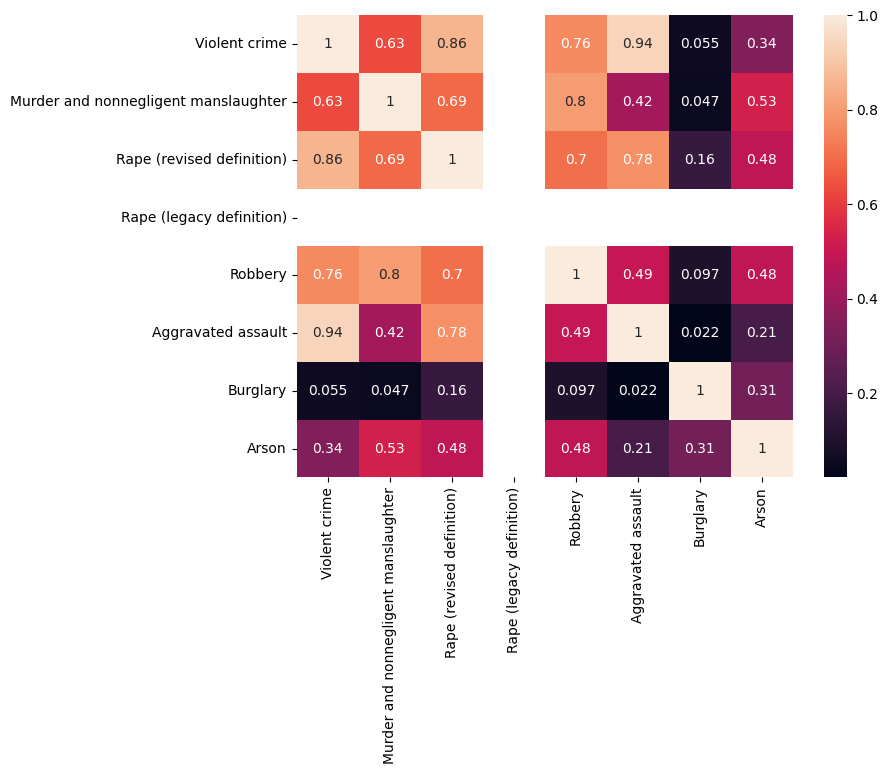

In [106]:
corr_matrix = df.corr() #ваш код здесь
corr_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
#вывод здесь

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [152]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]